# Reading shape of digits and performing basic Neural Network model on MNIST datasets.

# Author- Rohan Kulkarni

In [1]:
#!pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.version.VERSION

'2.6.0'

In [4]:
## softmax function

In [5]:
import numpy as np
z=np.exp(11)+np.exp(12)+np.exp(13)
z

665042.3251431222

In [6]:
proba_a=np.exp(11)/z
proba_a

0.09003057317038046

In [7]:
proba_b=np.exp(12)/z
proba_b

0.24472847105479764

In [8]:
proba_c=np.exp(13)/z
proba_c

0.6652409557748219

In [9]:
np.exp(13)

442413.3920089205

In [10]:
np.exp(12)

162754.79141900392

In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras

In [12]:
# label is target variable

In [13]:
# mnist image data of hand return digits
# one row is one image
# 42000 images
# each image 784 pixcels (784 dots or cell )
#maximum pixcsel255
# 2parts
# 1)this is image data
#2) Build the model MLP

In [5]:
mnist=pd.read_csv(r"E:\Imarticus\15.NEURAL NETWORK\MNIST_TRAIN.csv")

In [6]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
mnist.shape

(42000, 785)

In [16]:
abcd=mnist.iloc[3,1:]
abcd

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 3, Length: 784, dtype: int64

In [17]:
abcd=np.array(abcd)
abcd.shape

(784,)

In [18]:
abcd=abcd.reshape(28,28)# product of 28*28=784

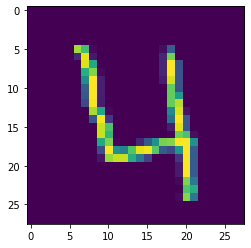

In [19]:
plt.imshow(abcd)

In [20]:
abcd=mnist.iloc[2,1:]
abcd

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 2, Length: 784, dtype: int64

In [21]:
abcd=np.array(abcd)
abcd.shape

(784,)

In [22]:
abcd=abcd.reshape(28,28)# product of 28*28=784

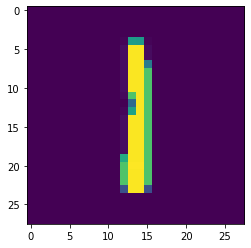

In [23]:
plt.imshow(abcd)

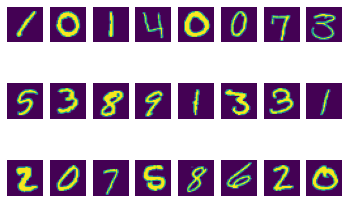

In [24]:
mnist1=mnist.iloc[:,1:786]
mnist1=np.array(mnist1)
for i in range (24):
    plt.subplot(3,8,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis("off")

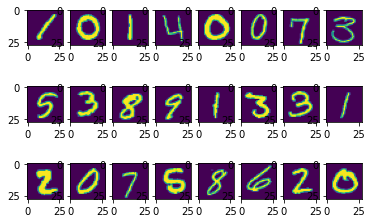

In [25]:
mnist1=mnist.iloc[:,1:786]
mnist1=np.array(mnist1)
for i in range (24):
    plt.subplot(3,8,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
# plt.axis("off")

In [26]:
## Neural network coading starts

In [27]:
mnist=pd.read_csv(r"E:\Imarticus\15.NEURAL NETWORK\MNIST_TRAIN.csv")

In [28]:
mnist.shape

(42000, 785)

In [29]:
mnist_x=mnist.iloc[:,1:786]
mnist_y=mnist.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split
mnist_x_train,mnist_x_test,mnist_y_train,mnist_y_test=train_test_split(mnist_x,mnist_y,test_size=0.2)

In [31]:
mnist_x_train=tf.keras.utils.normalize(mnist_x_train)

In [32]:
mnist_x_test=tf.keras.utils.normalize(mnist_x_test)
#It sis not mandatory to take steps

In [33]:
model = tf.keras.models.Sequential() # initialize the model
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 1st layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # Last layer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [34]:
mnist_y_train=np.array(mnist_y_train)

In [45]:
model1=model.fit(mnist_x_train,mnist_y_train,epochs=40,validation_split=0.2,batch_size=32)

Epoch 1/40
840/840 [==============================] - 5s 5ms/step - loss: 0.0186 - accuracy: 0.9961 - val_loss: 0.3328 - val_accuracy: 0.9304
Epoch 2/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.1560 - val_accuracy: 0.9649
Epoch 3/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.1561 - val_accuracy: 0.9671
Epoch 4/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.1624 - val_accuracy: 0.9674
Epoch 5/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.1633 - val_accuracy: 0.9649
Epoch 6/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0131 - accuracy: 0.9952 - val_loss: 0.1693 - val_accuracy: 0.9679
Epoch 7/40
840/840 [==============================] - 4s 5ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.2134 - val_accuracy: 0.9640
Epoch 

In [36]:
model1.history

{'loss': [0.6189390420913696,
  0.22239378094673157,
  0.15859894454479218,
  0.12348144501447678,
  0.09823025017976761,
  0.07888419181108475,
  0.06476359069347382,
  0.05200976878404617,
  0.043072137981653214,
  0.03563772886991501,
  0.026465311646461487,
  0.021922502666711807,
  0.022060172632336617,
  0.014849835075438023,
  0.01303043495863676,
  0.011724970303475857,
  0.012752077542245388,
  0.01059707347303629,
  0.010600550100207329,
  0.0058333477936685085,
  0.006263409275561571,
  0.005973870866000652,
  0.007309867534786463,
  0.007571988273411989,
  0.019603613764047623,
  0.004731501918286085,
  0.0024858287069946527,
  0.005070486105978489,
  0.007199109066277742,
  0.012010818347334862,
  0.007041989825665951,
  0.000820194196421653,
  0.00016668236639816314,
  0.00011338515469105914,
  8.678711310494691e-05,
  7.176678627729416e-05,
  6.0345941164996475e-05,
  5.1217866712249815e-05,
  4.4123044062871486e-05,
  3.845054015982896e-05],
 'accuracy': [0.824739575386

In [37]:
df1=pd.DataFrame(model1.history)

In [38]:
df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.618939,0.824740,0.276801,0.918601
1,0.222394,0.932329,0.195274,0.940774
2,0.158599,0.952344,0.177672,0.943750
3,0.123481,0.962054,0.150268,0.952083
4,0.098230,0.970089,0.134175,0.958333


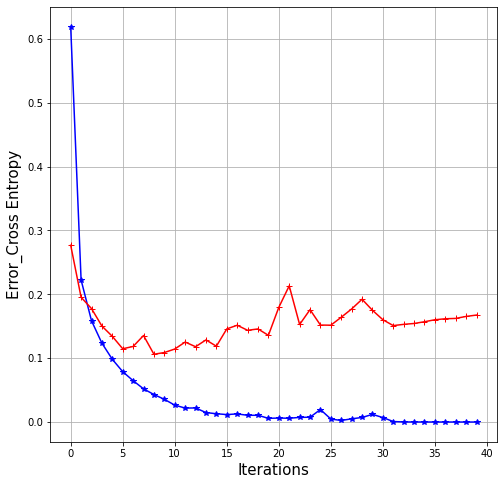

In [44]:
plt.figure(figsize=(8,8))

plt.plot(df1.loss,color='b',marker='*',label='loss')
plt.plot(df1.val_loss,color='r',marker='+',label='validation loss')
plt.grid()
plt.xlabel('Iterations',size=15)
plt.ylabel('Error_Cross Entropy',size=15)
plt.show()

In [40]:
pred1=model.predict(mnist_x_test)
pred1# prediction in prob

array([[1.54447524e-16, 9.57545311e-19, 1.09177404e-13, ...,
        8.71516567e-17, 4.68936651e-19, 1.31687879e-12],
       [5.82626341e-13, 1.40559644e-15, 8.03113164e-13, ...,
        1.45811107e-19, 1.00000000e+00, 2.32265229e-09],
       [4.06526945e-17, 8.57674608e-13, 1.00000000e+00, ...,
        4.43757884e-14, 5.94792049e-10, 1.03849828e-25],
       ...,
       [1.00000000e+00, 1.42742489e-17, 3.84099863e-10, ...,
        2.39020587e-12, 1.35869048e-17, 1.66080062e-18],
       [1.32843181e-10, 5.95630286e-16, 4.03201642e-14, ...,
        3.54356807e-20, 5.26497045e-15, 1.89971333e-18],
       [4.98203604e-14, 1.79949792e-13, 5.52185668e-07, ...,
        9.99999404e-01, 1.80369165e-15, 7.18489531e-14]], dtype=float32)

In [41]:
classes_x=np.argmax(pred1,axis=1)# featch the position og highest probability

In [42]:
from sklearn.metrics import confusion_matrix
tab_x = confusion_matrix(classes_x, mnist_y_test) 
tab_x

array([[786,   0,   3,   1,   1,   4,   3,   1,   3,   3],
       [  0, 904,   4,   1,   3,   0,   0,   6,   6,   0],
       [  4,   2, 836,  11,   2,   1,   0,  12,   1,   0],
       [  2,   0,   4, 821,   0,  13,   0,   1,   5,   3],
       [  0,   1,   0,   0, 768,   1,   0,   5,   0,   9],
       [  1,   0,   0,   7,   2, 763,   3,   1,   5,   5],
       [  3,   0,   0,   0,   3,   7, 809,   1,   4,   0],
       [  0,   4,   4,   1,   2,   1,   0, 873,   0,  13],
       [  2,   3,   9,   6,   0,   8,   1,   0, 818,   3],
       [  1,   0,   0,   2,   7,   3,   0,   5,   4, 785]], dtype=int64)

In [43]:
# no of layes,max acc,layrs et c